# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
#Libraries

#numpy and pandas used for data manipulation
import pandas as pd
import numpy as np

# Seaborn for visualization
import seaborn as sns

# Matplotlib visualization
import matplotlib.pyplot as plt

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Display up to 101 columns of a dataframe
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [ ]:
# Dataset is already loaded below
data = pd.read_csv("/content/train.csv")


In [ ]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
data.shape

(2870, 12)

In [ ]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [ ]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [ ]:
# Trying to check if the given dataset is balanced or unbalanced set
data.yearly_availability.value_counts()

0    1439
1    1431
Name: yearly_availability, dtype: int64

#### Inference
- Given dataset is balanced datasset

### Data types and Missing values

<Figure size 720x720 with 0 Axes>

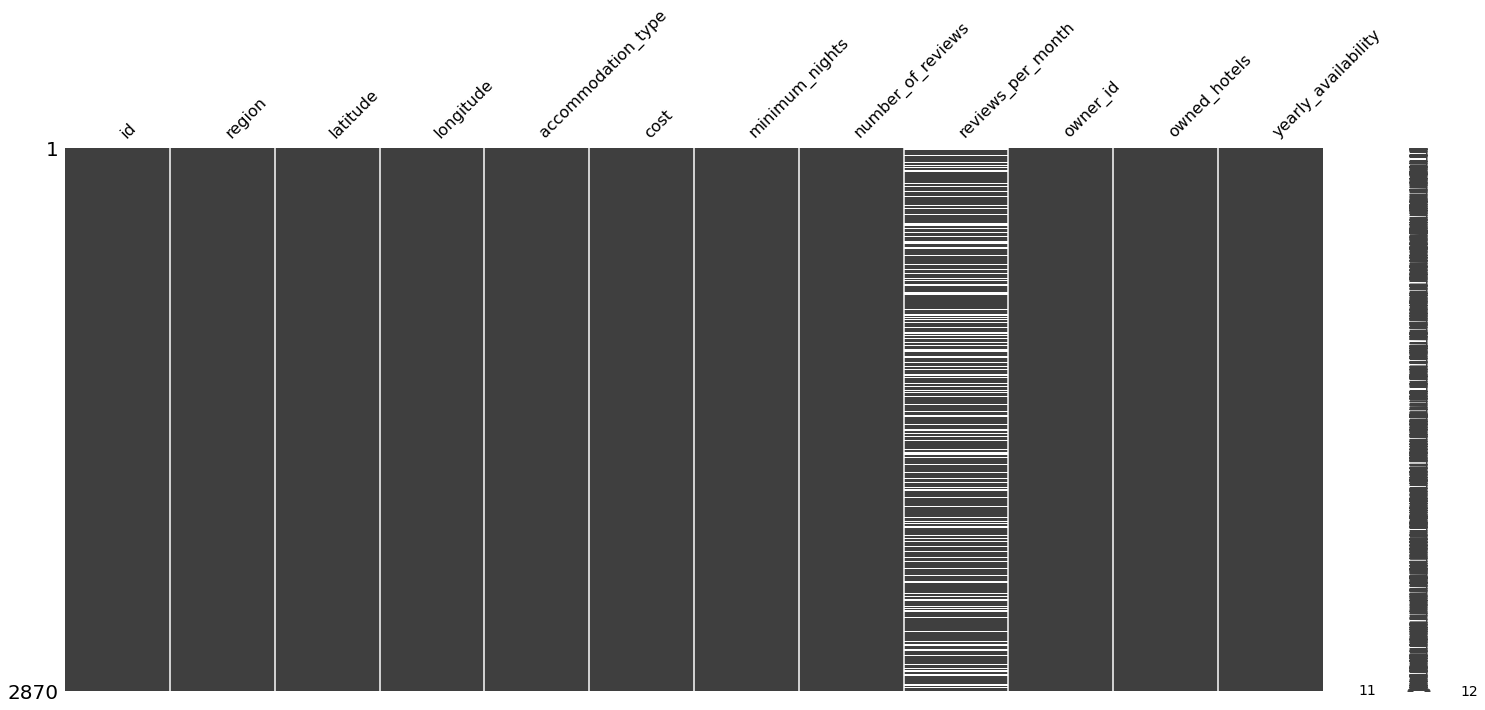

In [ ]:
# Visualize the missing values
import missingno as msno
plt.figure(figsize=(10,10)) 
msno.matrix(data)

#### Inference:
- From the graph we see there are too many missing values in reviews_per_month. This happend because host might have neglet to provide reviews. Since there are too many missing value. So we can't calculate from the graph directly

In [ ]:
# To see the datatypes and non-missing values
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

#### Inference
- After loading the dataset we can see a number of things.Our dataset is a mixture of integer, float and object/categorical. We have 7 integer data, 2 categorical data, 2 float data

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
# Calculating missing values
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
reviews_per_month,676,23.6


- Since there are less than 50% missing values. I'm imputing the null values with 0.

In [ ]:
# Handling missing values
data['reviews_per_month'].fillna(value=0,inplace=True)
print("Null value in reviews per month feture are : ",data['reviews_per_month'].isnull().sum())

Null value in reviews per month feture are :  0


we have handled missing values. Now let's go drop any unwanted features.

In [ ]:
id = data.id
data.drop(columns=["id"], inplace=True)

### Outliers

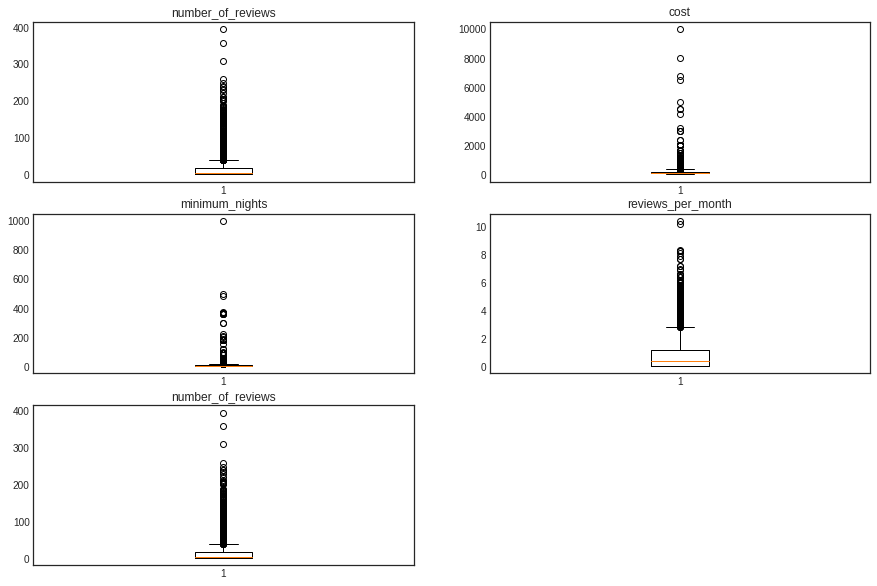

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
pltNum = [x for x in range(321,326)]
cols = ['number_of_reviews', 'cost', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']
for i,col in enumerate(cols):
    ax=plt.subplot(pltNum[i])
    plt.boxplot(data[col])
    ax.set_title(col)

#### Inference

- All the numerical feature has lot of outliers. It's better to remove outliers in my experience

In [ ]:
def removeOutliers(data):
    for col in ['number_of_reviews', 'cost', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']:
      # Calculate first and third quartile
      first_quartile = data[col].describe()['25%']
      third_quartile = data[col].describe()['75%']

      # Interquartile range
      iqr = third_quartile - first_quartile

      # Remove outliers
      data = data[(data[col] > (first_quartile - 1.5 * iqr)) &
                  (data[col] < (third_quartile + 1.5 * iqr))]
    return data

data = removeOutliers(data)

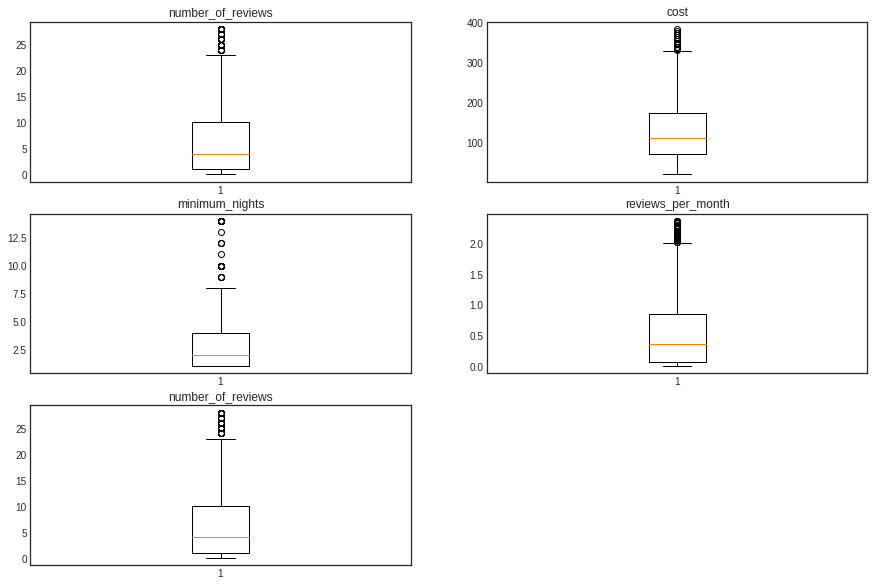

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
pltNum = [x for x in range(321,326)]
cols = ['number_of_reviews', 'cost', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']
for i,col in enumerate(cols):
    ax=plt.subplot(pltNum[i])
    plt.boxplot(data[col])
    ax.set_title(col)

In [ ]:
data.shape

(1622, 11)

- Most of the outliers has been removed.

In [ ]:
data.yearly_availability.value_counts()

0    919
1    703
Name: yearly_availability, dtype: int64

### Hurrah, still the dataset is a balanced.

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

### let's visualize categorical box plots

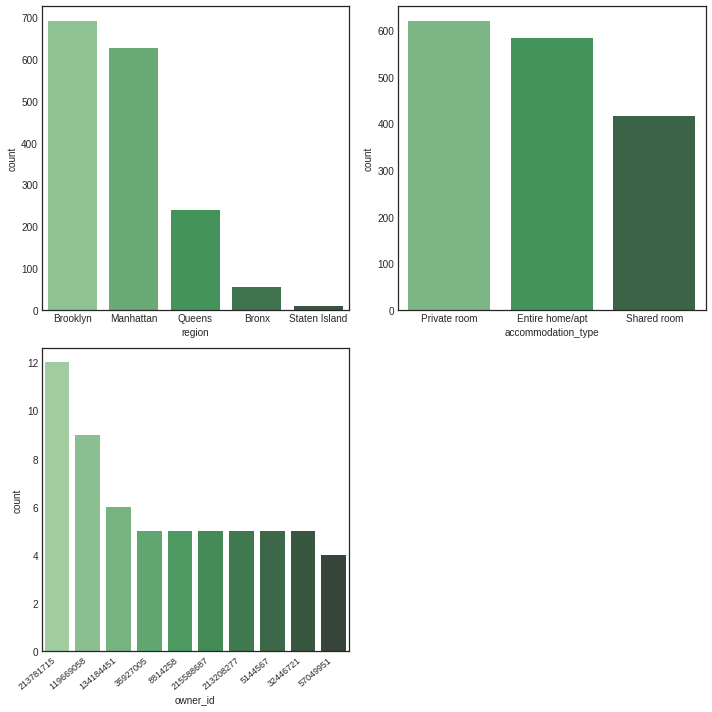

In [ ]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

cols = ['region','accommodation_type']
pltNum = [x for x in range(221,223)]
for i,col in enumerate(cols):
    plt.subplot(pltNum[i])
    sns.countplot(x=col, data=data, palette="Greens_d",
              order=data[col].value_counts().index)
    fig = plt.gcf()
    fig.set_size_inches(10,10)

plt.subplot(223)
ax=sns.countplot(x="owner_id", data=data, palette="Greens_d",
              order=data.owner_id.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#### Inference

- In region(location) Manhattan and Brooklyn stands in the top 2 positions respectively owing to the number of hotels in the region and it is followed by Queens, Bronx and Staten Island.
- Most of the Entire home were booked than private and shared room type.
- owner with id 213781715 has most number of hotels.

### Let's Visulaize Numerical data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

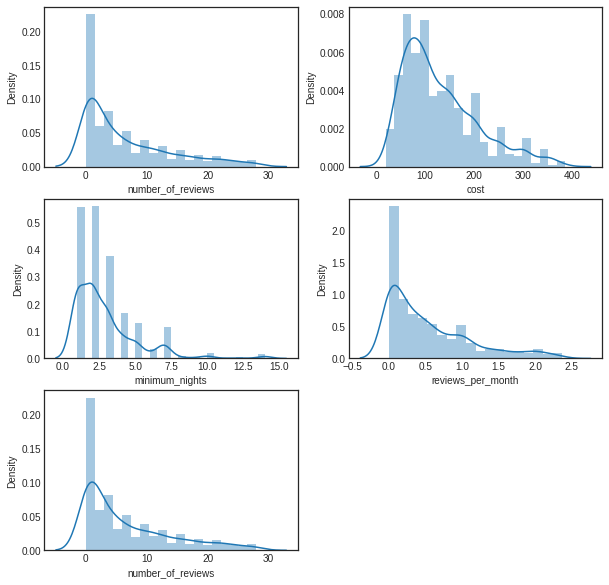

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
pltNum = [x for x in range(321,326)]
cols = ['number_of_reviews', 'cost', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']
for i,col in enumerate(cols):
    ax=plt.subplot(pltNum[i])
    sns.distplot(data[col])
    fig = plt.gcf()
    fig.set_size_inches(10,10)

#### Inference

- All features are right skewed distribution
- number_of_reviews and reviews_per_month looks similar and dependent on each other
- cost has uneven distribution

### Distribution of Yearly Availability across location

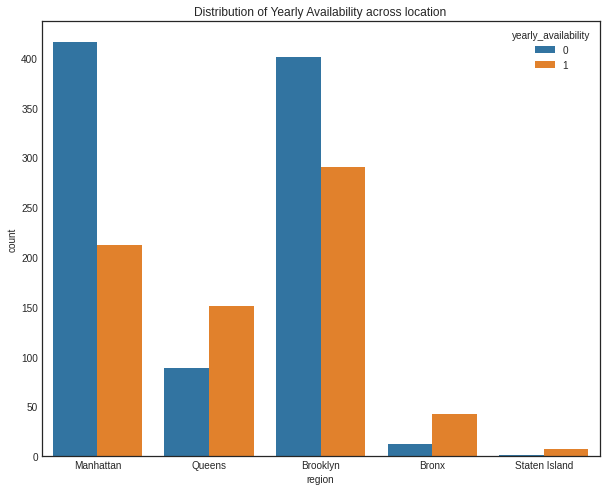

In [ ]:
plt.style.use('seaborn-white')
f, ax=plt.subplots(figsize=(10,8))
ax.set_title('Distribution of Yearly Availability across location')
ax.set_ylabel('Region')
sns.countplot(x = 'region',hue = "yearly_availability",data = data)
plt.show()

- Availability of hotels are more in Brooklyn, Manhattan respectively and lead is followed by Queens bronx and Staten Island.

### Geographical Analysis

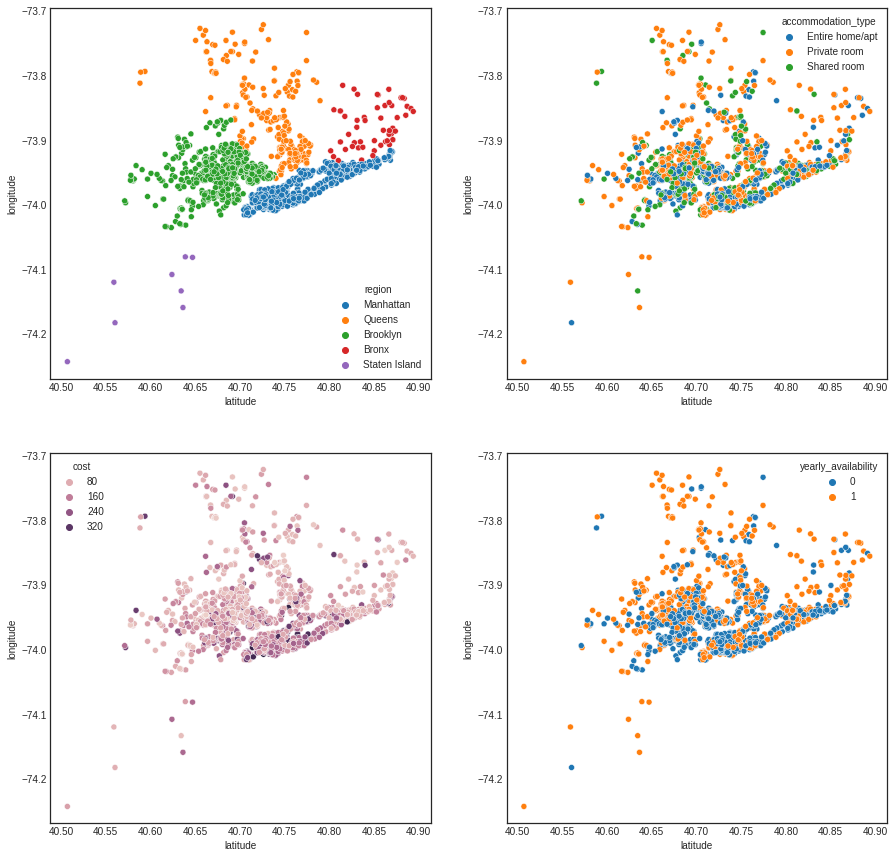

In [ ]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
column = ['region', 'accommodation_type', 'cost', 'yearly_availability']
pltNum = np.arange(221,225)
for i,col in enumerate(column):
    plt.subplot(pltNum[i])
    sns.scatterplot(x="latitude", y="longitude",hue=col, data=data)

#### Inference
- Very less number of people prefers shared room,and people in Staten Island mainly prefers Entire home/apartment.
- The cost in Staten Island are low even most of them prefer Entire home/ apartment whereas the price range in Manhattan are pretty high.
- Brooklyn,Queens and Bronx are being listed most  of days for airbnb space in a year than rest of the location. 

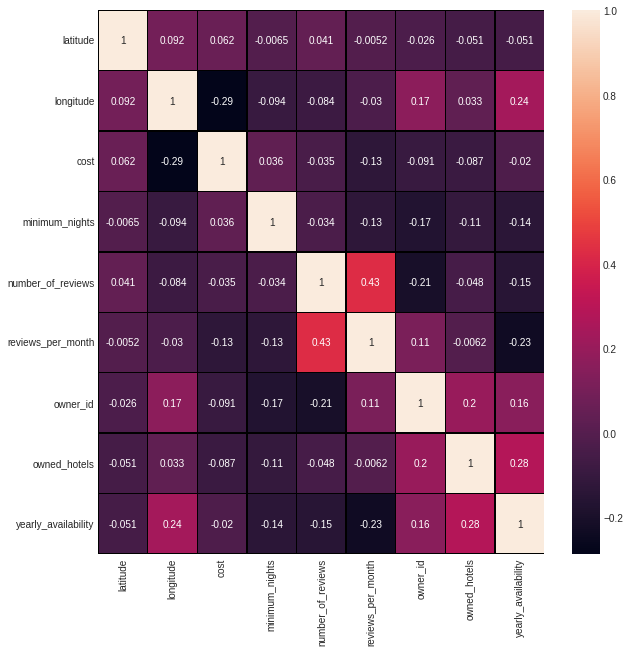

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="black",ax=ax)
plt.show()

#### Inference

- yearly_availability and owned_hotels have a small positive correlation (0.28), indicating that no of the number of hotels ownes is more then yearly_availability of the hotels is also more may be because host runs his bussiness mainly in it and also attain experince in running it.
- Number of reviews and reviews per month have strong positive correlation and it is very obvious.

### Loading Testing data

In [ ]:
test = pd.read_csv("/content/test.csv")
test.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [ ]:
test.shape

(718, 11)

### Handing any missing values

In [ ]:
missing_values_table(test)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
reviews_per_month,173,24.1


- Just like training data, I'm replacing the null value with 0

In [ ]:
test['reviews_per_month'].fillna(0, inplace=True)
print("Null value in reviews per month feture are : ",test['reviews_per_month'].isnull().sum())

Null value in reviews per month feture are :  0




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


First let's consider the important features for the prediction. They are region, accommodation_type, cost, minimum_nights, number_of_reviews reviews_per_month, owned_hotels

In [ ]:
features = ['region', 'accommodation_type', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owned_hotels']
data_features = data[features]
y = data['yearly_availability']

data_features.head()

,region,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels
0,Manhattan,Entire home/apt,170,5,7,0.56,1
2,Queens,Private room,85,1,0,0.00,1
5,Manhattan,Private room,200,10,11,0.76,1
6,Brooklyn,Entire home/apt,95,1,8,0.52,2
7,Manhattan,Shared room,380,3,0,0.00,1


#### One-Hot Encoding 
- There are two columns are of Categorical data Converting them to numerical data.

In [ ]:
X = pd.get_dummies(data_features)
training_features = X.columns
X.head()

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,170,5,7,0.56,1,0,0,1,0,0,1,0,0
2,85,1,0,0.00,1,0,0,0,1,0,0,1,0
5,200,10,11,0.76,1,0,0,1,0,0,0,1,0
6,95,1,8,0.52,2,0,1,0,0,0,1,0,0
7,380,3,0,0.00,1,0,0,1,0,0,0,0,1


In [ ]:
X.shape

(1622, 13)

- Let's do the same on the test data.

In [ ]:
testing_data = pd.get_dummies(test[features])
testing_features = testing_data.columns
testing_data.head()

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,135,2,22,0.66,1,0,1,0,0,0,0,0,1
1,69,2,8,0.90,2,0,1,0,0,0,1,0,0
2,225,30,0,0.00,12,0,0,1,0,0,0,1,0
3,125,30,9,0.82,1,0,0,1,0,0,0,0,1
4,43,1,13,0.72,2,0,0,1,0,0,1,0,0


### Splitting data set into training, Cross validation and testing


In [ ]:
# Splitting data into Training, CV and Testdata
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_cv,y_cv,test_size=0.5, random_state=1)

### Standardizing our dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing the data using MinMaxScaler
min_max_scaler = MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)

x_cv = min_max_scaler.transform(x_cv)
x_test = min_max_scaler.transform(x_test)
testing_data = min_max_scaler.transform(testing_data)

print(x_train)
print("*"*20)
print(x_cv)
print("*"*20)
print(x_test)
print("*"*20)
print(testing_data)

[[0.51666667 0.         0.03571429 ... 0.         1.         0.        ]
 [0.36111111 0.15384615 0.21428571 ... 1.         0.         0.        ]
 [0.29166667 1.         0.         ... 0.         1.         0.        ]
 ...
 [0.13888889 0.07692308 0.28571429 ... 0.         0.         1.        ]
 [0.05833333 1.         0.89285714 ... 1.         0.         0.        ]
 [0.30555556 0.07692308 0.39285714 ... 1.         0.         0.        ]]
********************
[[0.22222222 0.         0.         ... 0.         1.         0.        ]
 [0.13888889 0.15384615 0.         ... 1.         0.         0.        ]
 [0.125      0.         0.35714286 ... 1.         0.         0.        ]
 ...
 [0.69444444 0.30769231 0.07142857 ... 0.         1.         0.        ]
 [0.08333333 0.15384615 0.17857143 ... 0.         1.         0.        ]
 [0.36111111 0.46153846 0.         ... 0.         0.         1.        ]]
********************
[[0.22222222 0.30769231 0.46428571 ... 1.         0.         0.       

In [ ]:
# Converting the data to DataFrames
x_train = pd.DataFrame(data=x_train,columns=training_features)
x_cv = pd.DataFrame(data=x_cv,columns=training_features)
x_test = pd.DataFrame(data=x_test, columns=testing_features)
testing_data = pd.DataFrame(data=testing_data, columns=testing_features)

In [ ]:
x_train.shape

(1135, 13)

In [ ]:
x_cv.shape

(243, 13)

In [ ]:
x_test.shape

(244, 13)

In [ ]:
testing_data.shape

(718, 13)

In [ ]:
accuracies_on_cv = []
accuracies_on_testing = []

#### Let's fit the model on the training data and vaidatie it on cv and testing data.

- Looking at the data. I personally feel that region, accommodation type & cost are the most important features. If the region is highly populated they need accomodation and therefor hotel will be available widely. People mostly prefers Entire apartment then private. If hotel contains entire apartment then owner make it available because people prefer those.
- Since all most important features are of categorical data type. I feel it's better to build the model using decision tree or random forest classifier. So let's try those first and see how it works.

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier(random_state=1)

tree_model.fit(x_train, y_train) #Fitting the model according to training dataset.

y_pred_tree = tree_model.predict(x_cv)# Predicting the target values.

tree_accuracy = accuracy_score(y_cv, y_pred_tree) # Calculating the accuracy of the model.

accuracies_on_cv.append(tree_accuracy)

print("Decision Tree Classifier model accuracy on CV data:",tree_accuracy)

Decision Tree Classifier model accuracy on CV data: 0.8641975308641975


- looks like it works really well on cross validation data. Let's see how it works on our testing data

model accuracy on testing data: 0.8401639344262295


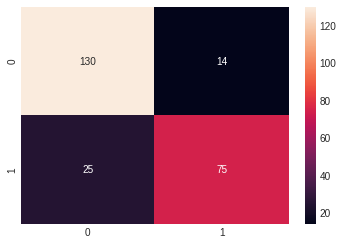

In [ ]:
pred = tree_model.predict(x_test)# Predicting the target values.

acc = accuracy_score(y_test, pred) # Calculating the accuracy of the model.

print("model accuracy on testing data:",acc)

accuracies_on_testing.append(acc)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='g')

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state=1)

rfc_model.fit(x_train, y_train) #Fitting the model according to training dataset.

y_pred_rfc = rfc_model.predict(x_cv)# Predicting the target values.

rfc_accuracy = accuracy_score(y_cv, y_pred_rfc) # Calculating the accuracy of the model.

accuracies_on_cv.append(rfc_accuracy)

print("Random Forest Classifier model accuracy on CV data:",rfc_accuracy)

Random Forest Classifier model accuracy on CV data: 0.9176954732510288


- It's accuracy improved even better in random forest classifier. Let's how it works on testing data.

model accuracy on testing data: 0.9344262295081968


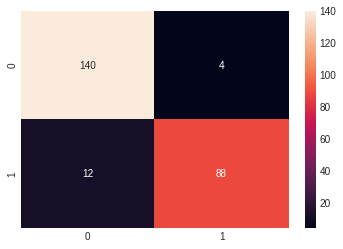

In [ ]:
pred = rfc_model.predict(x_test)# Predicting the target values.

acc = accuracy_score(y_test, pred) # Calculating the accuracy of the model.

print("model accuracy on testing data:",acc)

accuracies_on_testing.append(acc)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='g')

- Among the Desion tree and random forest classifier. Even though accuracy on training and cross validation is similar. Random forest Classifier has better accuracy on the Testing data also, Number of false positive and False negitives on the testing data is less in random forest model.

#### Let's also try how it works on algorithm as well.

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train) #Fitting the model according to training dataset.

y_pred_knn = knn_model.predict(x_cv)# Predicting the target values.

knn_accuracy = accuracy_score(y_cv, y_pred_knn)# Calculating the accuracy of the model.

accuracies_on_cv.append(knn_accuracy)

print("KNeighborsClassifier model accuracy :",knn_accuracy)

KNeighborsClassifier model accuracy : 0.8559670781893004


model accuracy on testing data: 0.889344262295082


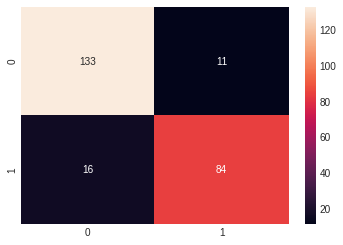

In [ ]:
pred = knn_model.predict(x_test)# Predicting the target values.

acc = accuracy_score(y_test, pred) # Calculating the accuracy of the model.

print("model accuracy on testing data:",acc)

accuracies_on_testing.append(acc)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='g')

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=1)

lr_model.fit(x_train, y_train) #Fitting the model according to training dataset.

y_pred_lr = lr_model.predict(x_cv) # Predicting the target values.

lr_accuracy = accuracy_score(y_cv, y_pred_lr)# Calculating the accuracy of the model.

accuracies_on_cv.append(lr_accuracy)

print("Logistic Regression model accuracy :",lr_accuracy)

Logistic Regression model accuracy : 0.8518518518518519


model accuracy on testing data: 0.9057377049180327


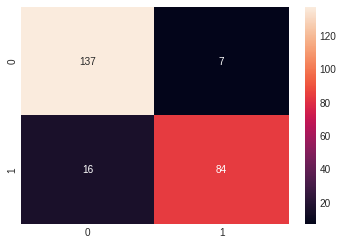

In [ ]:
pred = lr_model.predict(x_test)# Predicting the target values.

acc = accuracy_score(y_test, pred) # Calculating the accuracy of the model.

print("model accuracy on testing data:",acc)

accuracies_on_testing.append(acc)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='g')

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(C=0.5, kernel='rbf', break_ties=True, random_state=1)

svm_model.fit(x_train, y_train) #Fitting the model according to training dataset.

y_pred_svm = svm_model.predict(x_cv)# Predicting the target values.

svm_accuracy = accuracy_score(y_cv, y_pred_svm) # Calculating the accuracy of the model.

accuracies_on_cv.append(svm_accuracy)

print("Support Vector Machine model accuracy :",svm_accuracy)

Support Vector Machine model accuracy : 0.8436213991769548


model accuracy on testing data: 0.8729508196721312


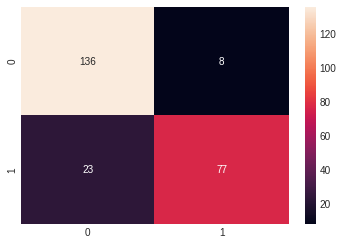

In [ ]:
pred = svm_model.predict(x_test)# Predicting the target values.

acc = accuracy_score(y_test, pred) # Calculating the accuracy of the model.

print("model accuracy on testing data:",acc)

accuracies_on_testing.append(acc)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='g')

### Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

gnb_model.fit(x_train, y_train) #Fitting the model according to training dataset.

y_pred_gnb = gnb_model.predict(x_cv) # Predicting the target values.

gnb_accuracy = accuracy_score(y_cv, y_pred_gnb) # Calculating the accuracy of the model.

accuracies_on_cv.append(gnb_accuracy)

print("Gaussian Naive Bayes's model accuracy :",gnb_accuracy)

Gaussian Naive Bayes's model accuracy : 0.8559670781893004


model accuracy on testing data: 0.9098360655737705


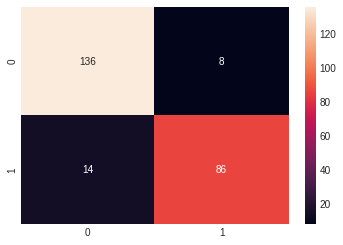

In [ ]:
pred = gnb_model.predict(x_test)# Predicting the target values.

acc = accuracy_score(y_test, pred) # Calculating the accuracy of the model.

print("model accuracy on testing data:",acc)

accuracies_on_testing.append(acc)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='g')

#### Accuracy Table

In [ ]:
models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'LogisticRegression','SVC', 'GaussianNB']

finalAccuracies = pd.DataFrame(data=np.c_[accuracies_on_cv, accuracies_on_testing], index=models_name, 
                               columns=['Accuracy Score on CV', 'Accuracy Score on Testing Data'])
finalAccuracies

,Accuracy Score on CV,Accuracy Score on Testing Data
DecisionTreeClassifier,0.864198,0.840164
RandomForestClassifier,0.917695,0.934426
KNeighborsClassifier,0.855967,0.889344
LogisticRegression,0.851852,0.905738
SVC,0.843621,0.872951
GaussianNB,0.855967,0.909836


- Looking at the accuracy we can clearly say that Random Forest Model is the best. Also for this model False positivies and False Negitive are very less on the un seen testing data. which clearly shouws that this Random Forest Model is neither overfit or underfit.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [ ]:
hotel_id = test.id

In [ ]:
hotel_id.head()

0    19215
1    36301
2    40566
3    33694
4    28873
Name: id, dtype: int64

In [ ]:
yearly_availability = rfc_model.predict(testing_data)

In [ ]:
submission_df = pd.DataFrame({"id": hotel_id , "yearly_availability":yearly_availability})
submission_df.head()

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0


In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---

In [ ]:
test = pd.read_csv("/content/test.csv")
test.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [ ]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
cols = ['name', "host_name", "neighbourhood", "last_review"]
df.drop(columns=cols, inplace=True)
df.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df.rename(columns={"host_id":"owner_id","neighbourhood_group":"region",
                   "room_type":"accommodation_type", "price":"cost", 
                   "calculated_host_listings_count": "owned_hotels",
                   "availability_365":"yearly_availability"}, inplace=True)
df.head()

,id,owner_id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df.yearly_availability = df.yearly_availability.apply(lambda x : 1 if x == 365 else 0)
df.head()

,id,owner_id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,1
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,5022,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df.drop(columns=['id'], inplace=True)
df.head()

,owner_id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,1
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
test.drop(columns=['id'], inplace=True)
test.head()

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [ ]:
test_data_dummy_1 = df.merge(test)
test_data_dummy_1.shape

(209, 11)

In [ ]:
missing_values_table(test_data_dummy_1)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
reviews_per_month,44,21.1


In [ ]:
# Handling missing values
test_data_dummy_1['reviews_per_month'].fillna(value=0,inplace=True)
print("Null value in reviews per month feture are : ",test_data_dummy_1['reviews_per_month'].isnull().sum())

Null value in reviews per month feture are :  0


In [ ]:
test_data_dummy_2 = test_data_dummy_1[features]
test_data_dummy_2.head()

,region,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels
0,Brooklyn,Private room,35,60,0,0.00,1
1,Manhattan,Private room,65,3,52,0.63,1
2,Brooklyn,Entire home/apt,64,20,70,0.73,1
3,Manhattan,Private room,255,4,1,0.02,1
4,Brooklyn,Entire home/apt,100,3,63,0.72,2


In [ ]:
test_data_dummy_3 = pd.get_dummies(test_data_dummy_2)

test_data_dummy_3.head()

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,35,60,0,0.00,1,0,1,0,0,0,0,1,0
1,65,3,52,0.63,1,0,0,1,0,0,0,1,0
2,64,20,70,0.73,1,0,1,0,0,0,1,0,0
3,255,4,1,0.02,1,0,0,1,0,0,0,1,0
4,100,3,63,0.72,2,0,1,0,0,0,1,0,0


In [ ]:
fea = test_data_dummy_3.columns

In [ ]:
target = test_data_dummy_1['yearly_availability']
target.head()

0    1
1    0
2    0
3    1
4    0
Name: yearly_availability, dtype: int64

In [ ]:
converted_test = min_max_scaler.transform(test_data_dummy_3)

In [ ]:
converted_test_df = pd.DataFrame(data=converted_test, columns=fea)
converted_test_df.head()

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,0.041667,4.538462,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.125000,0.153846,1.857143,0.265823,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.122222,1.461538,2.500000,0.308017,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.652778,0.230769,0.035714,0.008439,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.222222,0.153846,2.250000,0.303797,0.021739,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
p = tree_model.predict(converted_test_df)# Predicting the target values.

acc = accuracy_score(target, p) # Calculating the accuracy of the model.

print("Decision Tree Classifier model accuracy :",acc)

Decision Tree Classifier model accuracy : 0.7894736842105263


In [ ]:
pred = rfc_model.predict(converted_test_df)# Predicting the target values.

acc = accuracy_score(target, pred) # Calculating the accuracy of the model.

print("Decision Tree Classifier model accuracy :",acc)

Decision Tree Classifier model accuracy : 0.8038277511961722


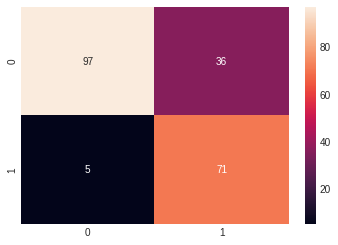

In [ ]:
cm = confusion_matrix(target,pred)
sns.heatmap(cm, annot=True)